In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611258 entries, 0 to 1611257
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1611258 non-null  int64  
 1   kWh       1611258 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.6 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1611253    0.16
1611254    0.16
1611255    0.16
1611256    0.16
1611257    0.16
Name: kWh, Length: 1611258, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1611253    0.16
1611254    0.16
1611255    0.16
1611256    0.16
1611257    0.16
Name: kWh, Length: 1611258, dtype: float64

In [7]:
l=len(conso_data)-1
l

1611257

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611258 entries, 0 to 1611257
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1611258 non-null  int64  
 1   kWh        1611258 non-null  float64
 2   sec        1611258 non-null  float64
 3   Wh         1611258 non-null  float64
 4   cumul(ms)  1611258 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 61.5 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1611253,22739,0.16,22.739,158.318308,39834447055
1611254,22923,0.16,22.923,157.047507,39834469978
1611255,22847,0.16,22.847,157.569922,39834492825
1611256,22770,0.16,22.770,158.102767,39834515595
1611257,22295,0.16,22.295,161.471182,39834537890


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

39834537890000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 7, 6, 825387)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [18]:
conso_data['dates']

0         2023-08-21 19:07:28.759387
1         2023-08-21 19:07:50.617387
2         2023-08-21 19:08:12.618387
3         2023-08-21 19:08:34.546387
4         2023-08-21 19:08:56.437387
                     ...            
1611253   2024-11-24 20:14:33.880387
1611254   2024-11-24 20:14:56.803387
1611255   2024-11-24 20:15:19.650387
1611256   2024-11-24 20:15:42.420387
1611257   2024-11-24 20:16:04.715387
Name: dates, Length: 1611258, dtype: datetime64[ns]

## créer les dates

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:07:28.759387,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:07:50.617387,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:08:12.618387,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:08:34.546387,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:08:56.437387,21/08/23
...,...,...,...,...,...,...,...
1611253,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24
1611254,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24
1611255,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24
1611256,22770,0.16,22.770,158.102767,39834515595,2024-11-24 20:15:42.420387,24/11/24


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('24/11/24', 24, 11, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'20:16:41'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1608331 to 1611257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2927 non-null   int64         
 1   kWh        2927 non-null   float64       
 2   sec        2927 non-null   float64       
 3   Wh         2927 non-null   float64       
 4   cumul(ms)  2927 non-null   int64         
 5   dates      2927 non-null   datetime64[ns]
 6   days       2927 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 182.9+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.831, 3.7, 4.232, 3.68, 4.188, 4.609, 3.524, 3.409, 3.514, 3.695, 3.767, 3.795, 4.255, 3.806, 3.465, 3.64, 3.323, 3.375, 4.288, 4.006, 4.045, 3.924, 3.444, 4.453, 3.746, 3.761, 4.366, 4.683, 3.803, 3.223, 3.18, 3.999, 3.672, 3.166, 3.796, 4.146, 3.755, 3.573, 4.781, 4.187, 4.543, 3.774, 3.408, 4.304, 3.877, 3.864, 3.437, 4.08, 3.655, 3.399, 4.135, 3.383, 3.887, 3.836, 3.643, 3.751, 4.244, 3.303, 3.87, 2.98, 2.055, 2.042, 2.454, 4.088, 3.724, 4.33, 3.615, 3.92, 3.743, 3.92, 3.988, 4.111, 3.647, 3.158, 3.804, 3.51, 3.624, 3.709, 3.685, 3.239, 3.905, 3.216, 3.789, 3.608, 4.082, 3.587, 3.366, 3.816, 4.064, 4.333, 4.132, 3.997, 4.231, 3.749, 3.923, 3.864, 3.913, 3.742, 4.045, 4.346, 3.886, 3.504, 3.683, 3.673, 3.345, 3.846, 3.995, 4.103, 3.474, 4.176, 3.606, 4.077, 4.531, 3.684, 3.428, 3.581, 4.164, 3.695, 4.083, 3.98, 3.745, 3.592, 5.128, 3.699, 3.765, 4.293, 4.102, 4.715, 4.401, 3.983, 3.779, 4.361, 4.681, 4.199, 4.788, 4.319, 3.722, 4.18, 3.706, 3.635, 3.531, 3.946, 3.673, 3.786, 3.577

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1611258

In [30]:
period(p=2)

2023-08-22 01:13:42.562387	2023-08-22 08:17:58.182387	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293171
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.487571
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

2.927

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1608331 to 1611257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2927 non-null   int64         
 1   kWh        2927 non-null   float64       
 2   sec        2927 non-null   float64       
 3   Wh         2927 non-null   float64       
 4   cumul(ms)  2927 non-null   int64         
 5   dates      2927 non-null   datetime64[ns]
 6   days       2927 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 182.9+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


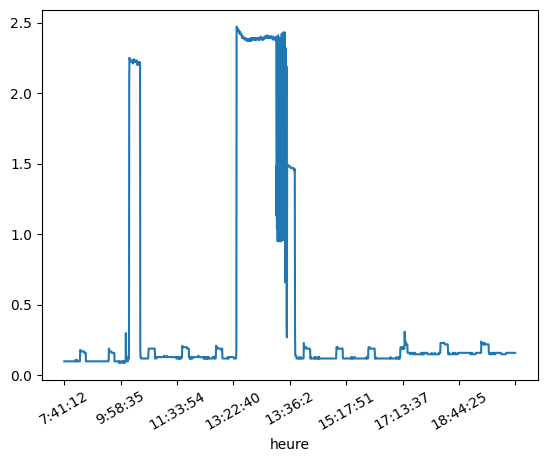

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:07:28.759387,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:07:50.617387,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:08:12.618387,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:08:34.546387,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:08:56.437387,21/08/23
...,...,...,...,...,...,...,...
1611253,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24
1611254,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24
1611255,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24
1611256,22770,0.16,22.770,158.102767,39834515595,2024-11-24 20:15:42.420387,24/11/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:6,27799,0.13,27.799,129.501061,39761580076,2024-11-24 00:00:06.901387,24/11/24
0:0:35,28345,0.13,28.345,127.006527,39761608421,2024-11-24 00:00:35.246387,24/11/24
0:1:3,28226,0.13,28.226,127.541983,39761636647,2024-11-24 00:01:03.472387,24/11/24
0:1:31,27946,0.13,27.946,128.819867,39761664593,2024-11-24 00:01:31.418387,24/11/24
0:1:56,25230,0.14,25.230,142.687277,39761689823,2024-11-24 00:01:56.648387,24/11/24
...,...,...,...,...,...,...,...
20:14:33,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24
20:14:56,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24
20:15:19,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.57
Min : 26/10/24 3.139


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1608331,27799,0.13,27.799,129.501061,39761580076,2024-11-24 00:00:06.901387,24/11/24,0:0:6
1608332,28345,0.13,28.345,127.006527,39761608421,2024-11-24 00:00:35.246387,24/11/24,0:0:35
1608333,28226,0.13,28.226,127.541983,39761636647,2024-11-24 00:01:03.472387,24/11/24,0:1:3
1608334,27946,0.13,27.946,128.819867,39761664593,2024-11-24 00:01:31.418387,24/11/24,0:1:31
1608335,25230,0.14,25.230,142.687277,39761689823,2024-11-24 00:01:56.648387,24/11/24,0:1:56
...,...,...,...,...,...,...,...,...
1611253,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24,20:14:33
1611254,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24,20:14:56
1611255,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24,20:15:19
1611256,22770,0.16,22.770,158.102767,39834515595,2024-11-24 20:15:42.420387,24/11/24,20:15:42


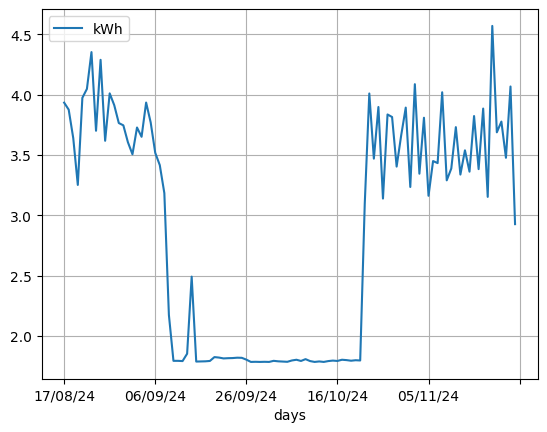

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-24 00:00:06.901387	2024-11-24 08:22:58.290387	8h 22m 51s 	1000
2024-11-24 08:22:58.290387	2024-11-24 13:58:24.089387	5h 35m 25s 	2000
2024-11-24 13:58:24.089387	2024-11-24 20:16:04.715387	6h 17m 40s 	927
<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1608331 to 1611257
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2927 non-null   int64         
 1   kWh        2927 non-null   float64       
 2   sec        2927 non-null   float64       
 3   Wh         2927 non-null   float64       
 4   cumul(ms)  2927 non-null   int64         
 5   dates      2927 non-null   datetime64[ns]
 6   days       2927 non-null   object        
 7   heure      2927 non-null   object        
 8   hours      2927 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 228.7+ KB


('24/11/24', <Axes: xlabel='hours'>)

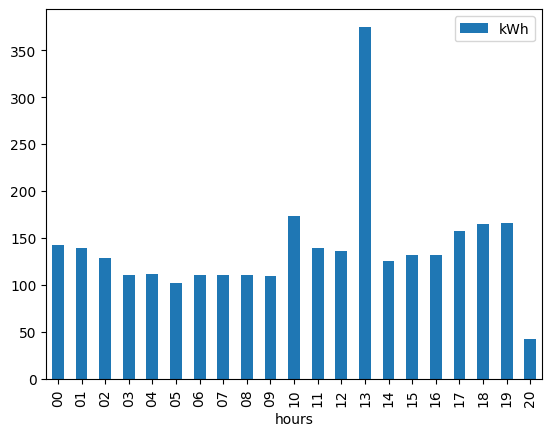

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.831
22/08/23,3.700
23/08/23,4.232
24/08/23,3.680
25/08/23,4.188
...,...
20/11/24,3.688
21/11/24,3.777
22/11/24,3.477


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


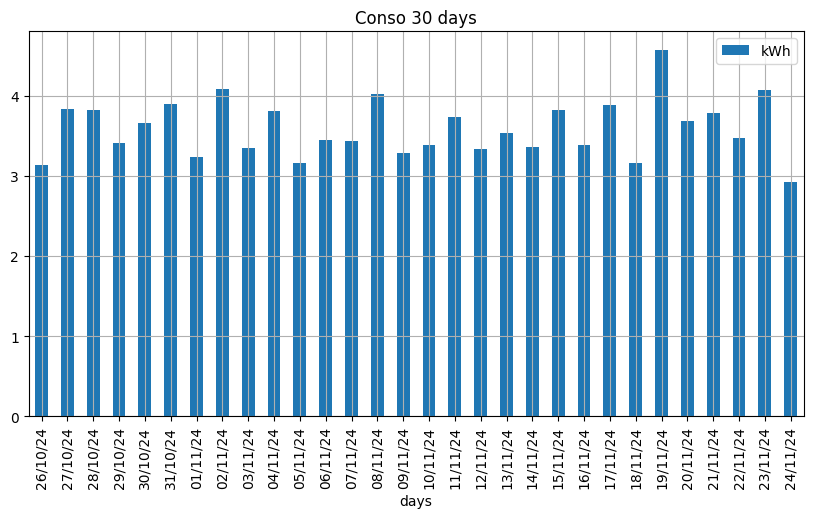

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


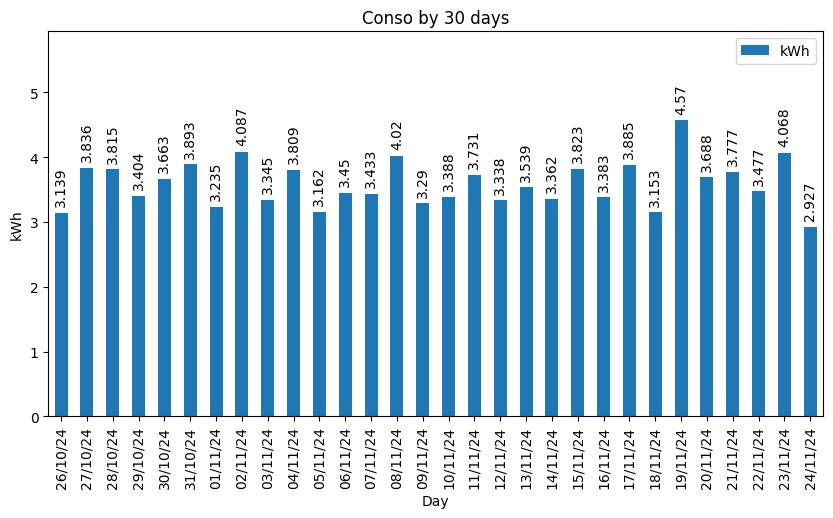

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
26/10/24    3.139
27/10/24    3.836
28/10/24    3.815
29/10/24    3.404
30/10/24    3.663
31/10/24    3.893
01/11/24    3.235
02/11/24    4.087
03/11/24    3.345
04/11/24    3.809
05/11/24    3.162
06/11/24    3.450
07/11/24    3.433
08/11/24    4.020
09/11/24    3.290
10/11/24    3.388
11/11/24    3.731
12/11/24    3.338
13/11/24    3.539
14/11/24    3.362
15/11/24    3.823
16/11/24    3.383
17/11/24    3.885
18/11/24    3.153
19/11/24    4.570
20/11/24    3.688
21/11/24    3.777
22/11/24    3.477
23/11/24    4.068
24/11/24    2.927
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['26/10/24', '27/10/24', '28/10/24', '29/10/24', '30/10/24', '31/10/24',
       '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24', '06/11/24',
       '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24', '12/11/24',
       '13/11/24', '14/11/24', '15/11/24', '16/11/24', '17/11/24', '18/11/24',
       '19/11/24', '20/11/24', '21/11/24', '22/11/24', '23/11/24', '24/11/24'],
      dtype='object', name='days')

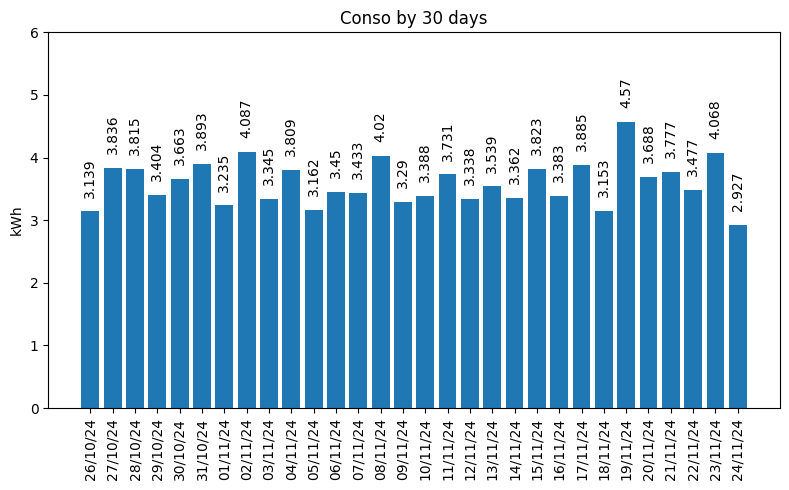

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

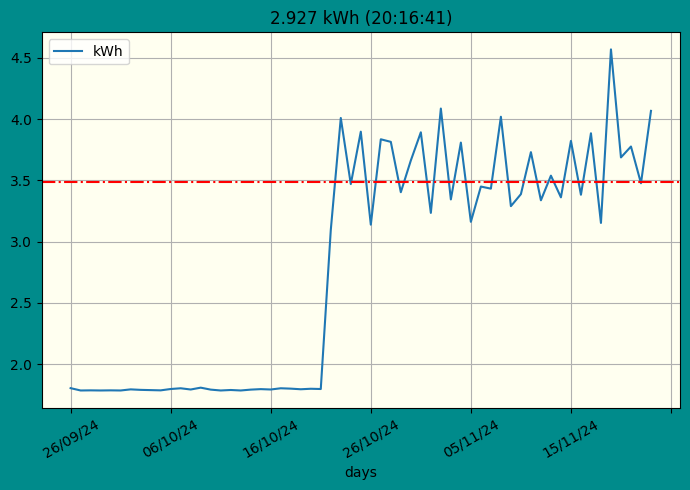

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

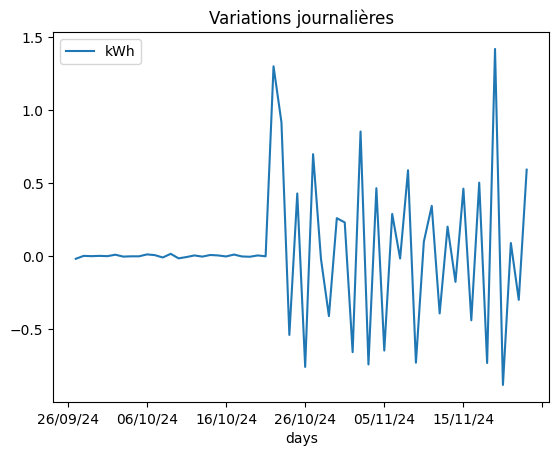

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:07:28.759387,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:07:50.617387,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:08:12.618387,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:08:34.546387,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:08:56.437387,21/08/23,19
...,...,...,...,...,...,...,...,...
1611253,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24,20
1611254,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24,20
1611255,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24,20
1611256,22770,0.16,22.770,158.102767,39834515595,2024-11-24 20:15:42.420387,24/11/24,20


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,831
22/08/23,3700
23/08/23,4232
24/08/23,3680
25/08/23,4188
...,...
20/11/24,3688
21/11/24,3777
22/11/24,3477


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:07:28.759387,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:07:50.617387,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:08:12.618387,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:08:34.546387,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:08:56.437387,21/08/23,19
...,...,...,...,...,...,...,...,...
1611253,22739,0.16,22.739,158.318308,39834447055,2024-11-24 20:14:33.880387,24/11/24,20
1611254,22923,0.16,22.923,157.047507,39834469978,2024-11-24 20:14:56.803387,24/11/24,20
1611255,22847,0.16,22.847,157.569922,39834492825,2024-11-24 20:15:19.650387,24/11/24,20
1611256,22770,0.16,22.770,158.102767,39834515595,2024-11-24 20:15:42.420387,24/11/24,20


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
24/11/24 20    1611253  24/11/24    20  0.16
               1611254  24/11/24    20  0.16
               1611255  24/11/24    20  0.16
               1611256  24/11/24    20  0.16
               1611257  24/11/24    20  0.16

[1611258 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,831,831
22/08/23,3700,3700
23/08/23,4232,4232
24/08/23,3680,3680
25/08/23,4188,4188
...,...,...
20/11/24,3688,3688
21/11/24,3777,3777
22/11/24,3477,3477


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        831
22/08/23       4531
23/08/23       8763
24/08/23      12443
25/08/23      16631
             ...   
20/11/24    1597009
21/11/24    1600786
22/11/24    1604263
23/11/24    1608331
24/11/24    1611258
Name: kWh, Length: 462, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     157
         20     284
         21     130
         22     130
         23     130
...             ...
24/11/24 16     132
         17     158
         18     165
         19     166
         20      43

[11066 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           157
          20           441
          21           571
          22           701
          23           831
                    ...   
24/11/24  16       1610726
          17       1610884
          18       1611049
          19       1611215
          20       1611258
Name: kWh, Length: 11066, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     157     157    NaN
         20     284     441  127.0
         21     130     571 -154.0
         22     130     701    0.0
         23     130     831    0.0
...             ...     ...    ...
24/11/24 16     132    2395    0.0
         17     158    2553   26.0
         18     165    2718    7.0
         19     166    2884    1.0
         20      43    2927 -123.0

[11066 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('24/11/24',
        kWh  cumsum   diff
 hours                    
 00     143     143    NaN
 01     140     283   -3.0
 02     129     412  -11.0
 03     111     523  -18.0
 04     112     635    1.0
 05     102     737  -10.0
 06     111     848    9.0
 07     111     959    0.0
 08     111    1070    0.0
 09     110    1180   -1.0
 10     174    1354   64.0
 11     140    1494  -34.0
 12     136    1630   -4.0
 13     375    2005  239.0
 14     126    2131 -249.0
 15     132    2263    6.0
 16     132    2395    0.0
 17     158    2553   26.0
 18     165    2718    7.0
 19     166    2884    1.0
 20      43    2927 -123.0)

Text(0.5, 1.0, 'Cumul journalier')

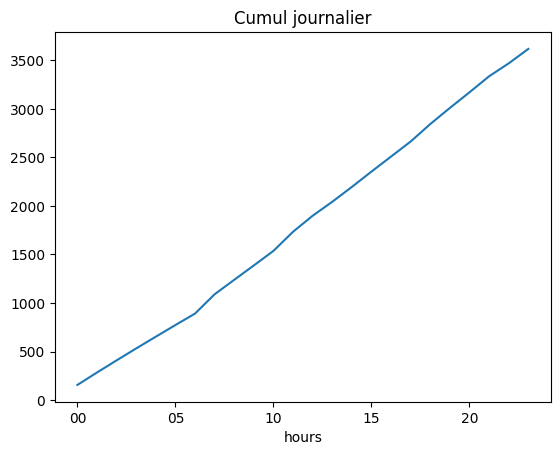

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

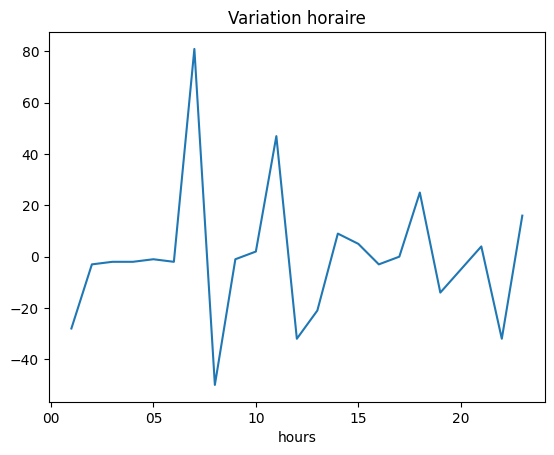

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

462

In [71]:
df_grp.tail(n)['kWh'].describe()


count    462.000000
mean       3.487571
std        0.703132
min        0.831000
25%        3.345000
50%        3.618000
75%        3.877750
max        5.128000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '462 days')

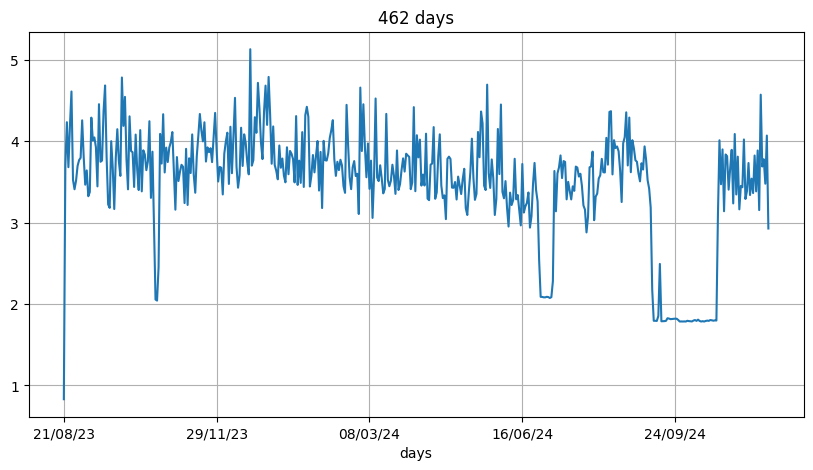

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

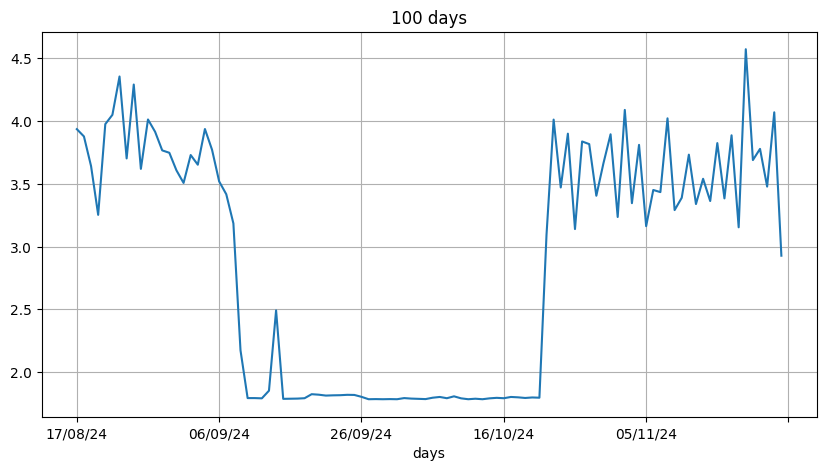

In [74]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.831
22/08/23    3.700
23/08/23    4.232
24/08/23    3.680
25/08/23    4.188
            ...  
20/11/24    3.688
21/11/24    3.777
22/11/24    3.477
23/11/24    4.068
24/11/24    2.927
Name: kWh, Length: 462, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,462.000000
mean,3.487571
std,0.703132
min,0.831000
25%,3.345000
50%,3.618000
75%,3.877750
max,5.128000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

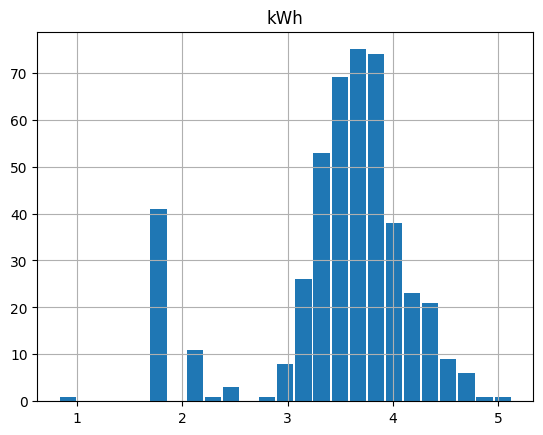

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
17/08/24    3.934
18/08/24    3.876
19/08/24    3.640
20/08/24    3.252
21/08/24    3.974
            ...  
20/11/24    3.688
21/11/24    3.777
22/11/24    3.477
23/11/24    4.068
24/11/24    2.927
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [79]:
day

'24/11/24'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,143,143,NaN
01,140,283,-3.0
02,129,412,-11.0
03,111,523,-18.0
04,112,635,1.0
05,102,737,-10.0
06,111,848,9.0
07,111,959,0.0
08,111,1070,0.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


21

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 22)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 00 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     21 non-null     int64  
 1   cumsum  21 non-null     int64  
 2   diff    20 non-null     float64
 3   days    21 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 840.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
Name: days, dtype: float64

In [89]:
day

'24/11/24'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,143,143,NaN,1.0
01,140,283,-3.0,2.0
02,129,412,-11.0,3.0
03,111,523,-18.0,4.0
04,112,635,1.0,5.0
05,102,737,-10.0,6.0
06,111,848,9.0,7.0
07,111,959,0.0,8.0
08,111,1070,0.0,9.0


Text(0.5, 1.0, '24/11/24')

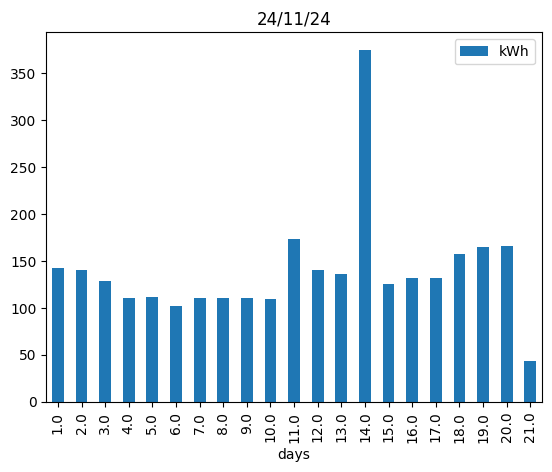

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,143
01,140
02,129
03,111
04,112
05,102
06,111
07,111
08,111


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    167
01    151
02    169
03    166
04    146
05    138
06    116
07    129
08    130
09    115
10    130
11    123
12    177
13    155
14    138
15    157
16    986
17    225
18    289
19    294
20    316
21    325
22    204
23    182
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

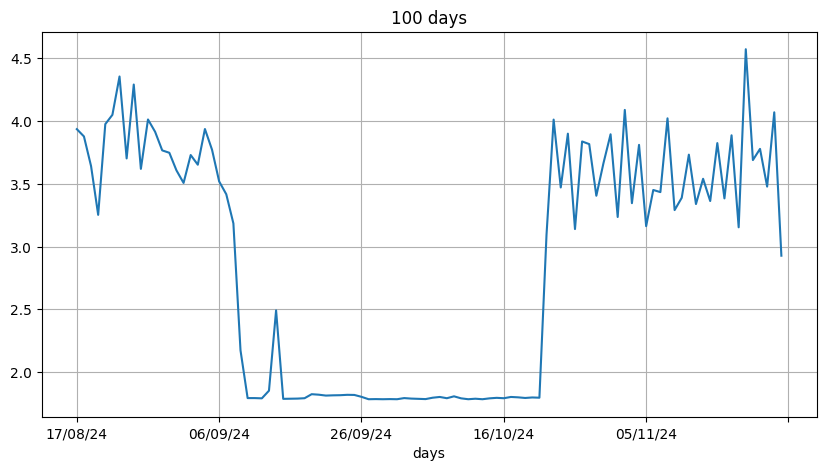

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [97]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

85.04427099227905


# Today

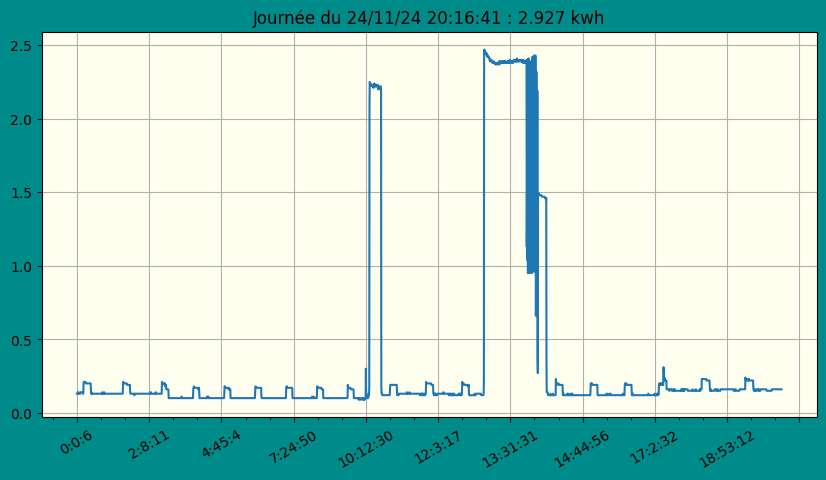

In [98]:
show(today,bgcolor='ivory')

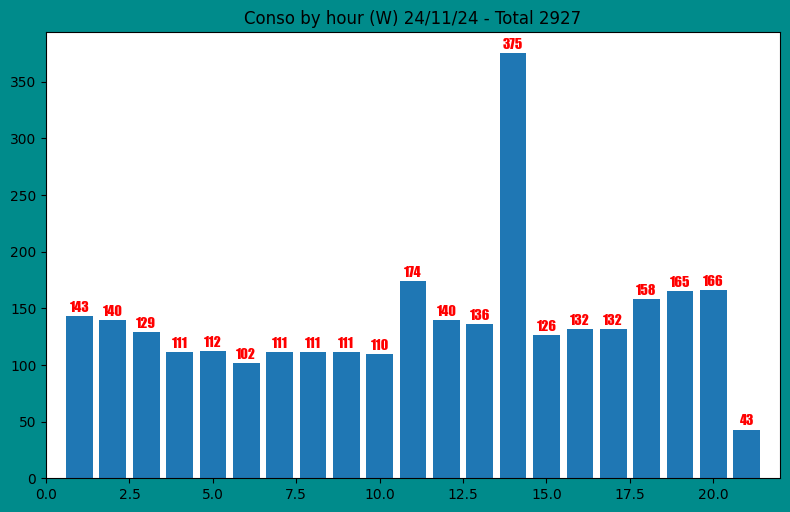

In [99]:
conso_by_hour(today)

In [100]:
day = '21/11/24'

('21/11/24', None)

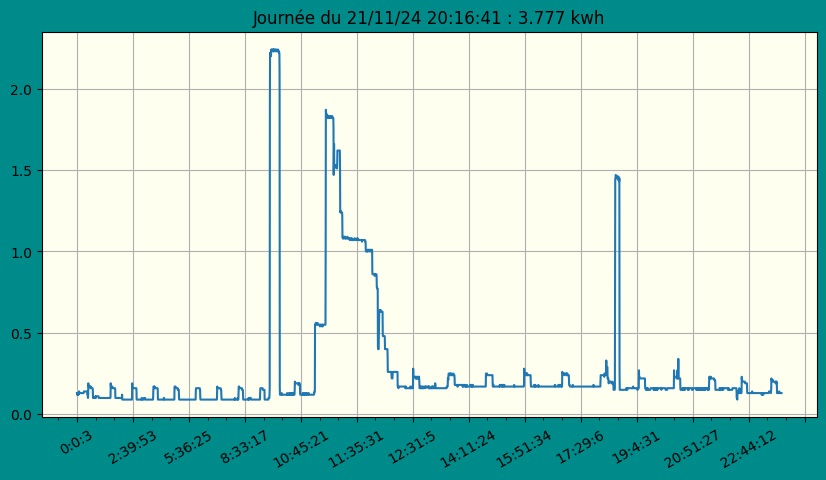

In [101]:
day, show(day,bgcolor='ivory')

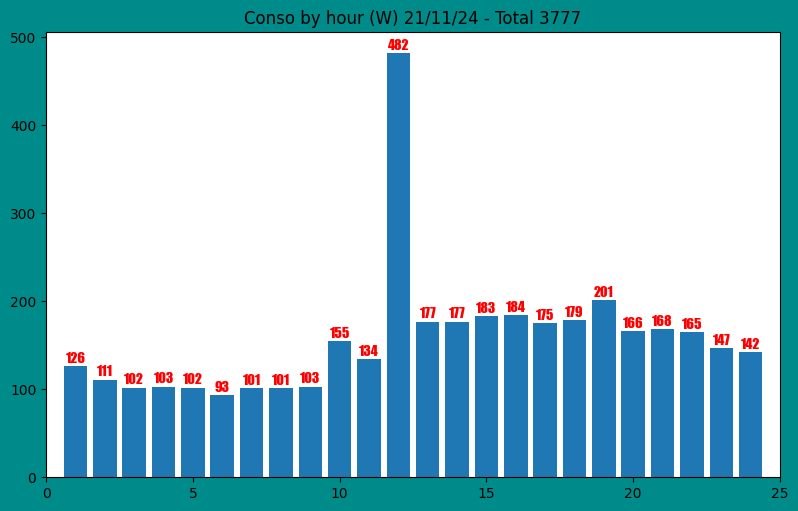

In [102]:
conso_by_hour(day)

('21/12/23', None)

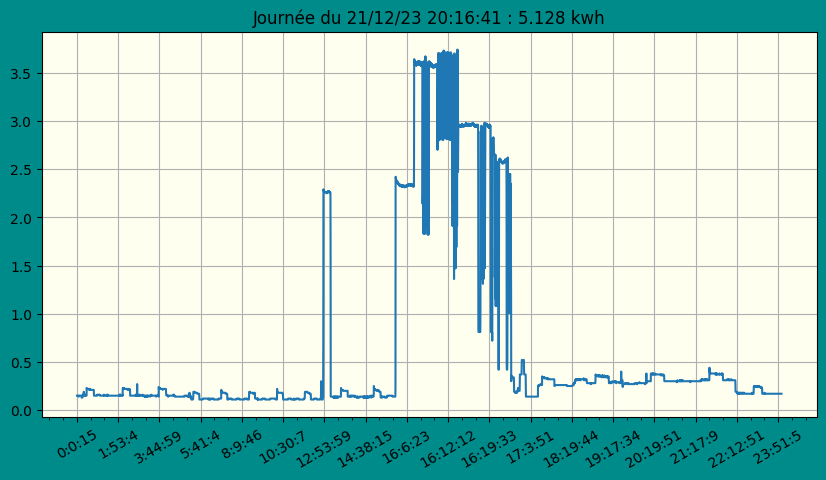

In [103]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

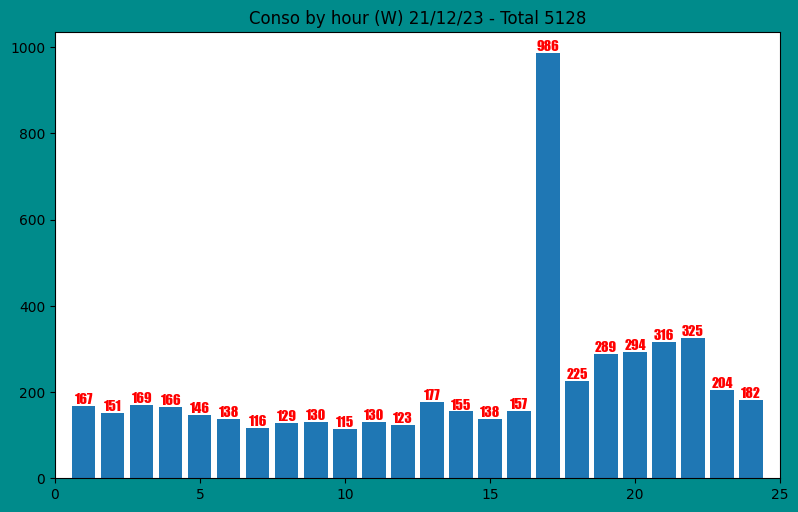

In [104]:
conso_by_hour(day)

In [105]:
sum(data)

5128

In [106]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,143,143,NaN,1.0
01,140,283,-3.0,2.0
02,129,412,-11.0,3.0
03,111,523,-18.0,4.0
04,112,635,1.0,5.0
05,102,737,-10.0,6.0
06,111,848,9.0,7.0
07,111,959,0.0,8.0
08,111,1070,0.0,9.0


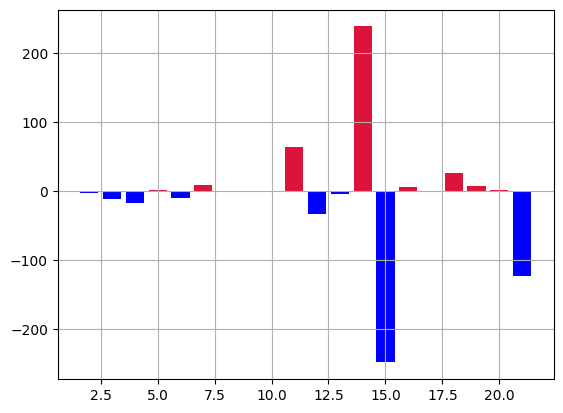

In [107]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [108]:
data

hours
00    167
01    151
02    169
03    166
04    146
05    138
06    116
07    129
08    130
09    115
10    130
11    123
12    177
13    155
14    138
15    157
16    986
17    225
18    289
19    294
20    316
21    325
22    204
23    182
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

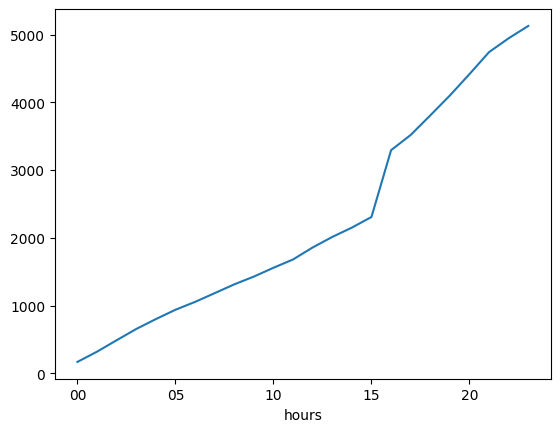

In [109]:
data.cumsum().plot()


<Axes: xlabel='hours'>

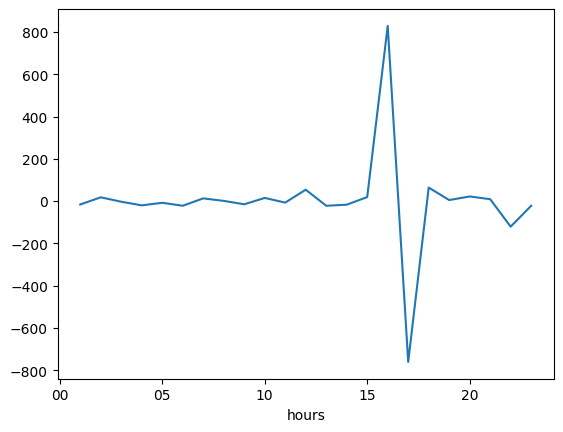

In [110]:
# evolution par heure
data.diff().plot()

In [111]:
data.diff().describe()

count     23.000000
mean       0.652174
std      242.376418
min     -761.000000
25%      -18.500000
50%       -3.000000
75%       16.500000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

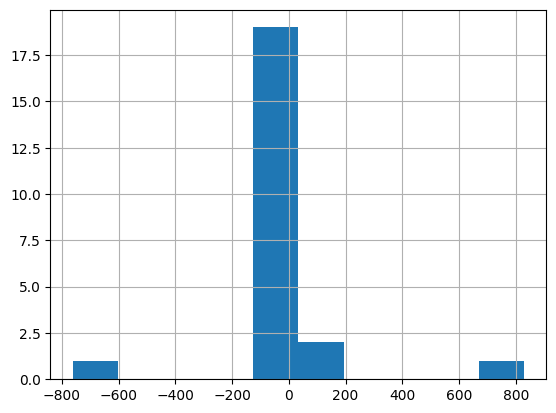

In [112]:
data.diff().hist()

# Test sauvegarde

In [113]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [114]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [115]:
#conso_byhour(day)

In [116]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


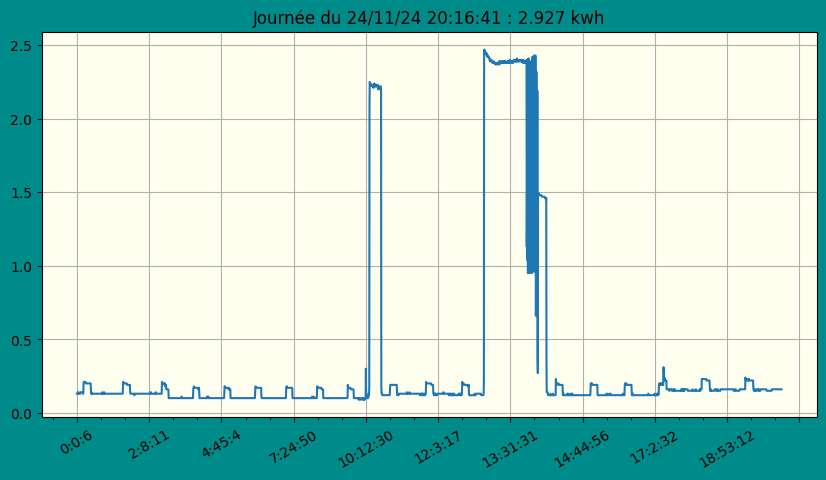

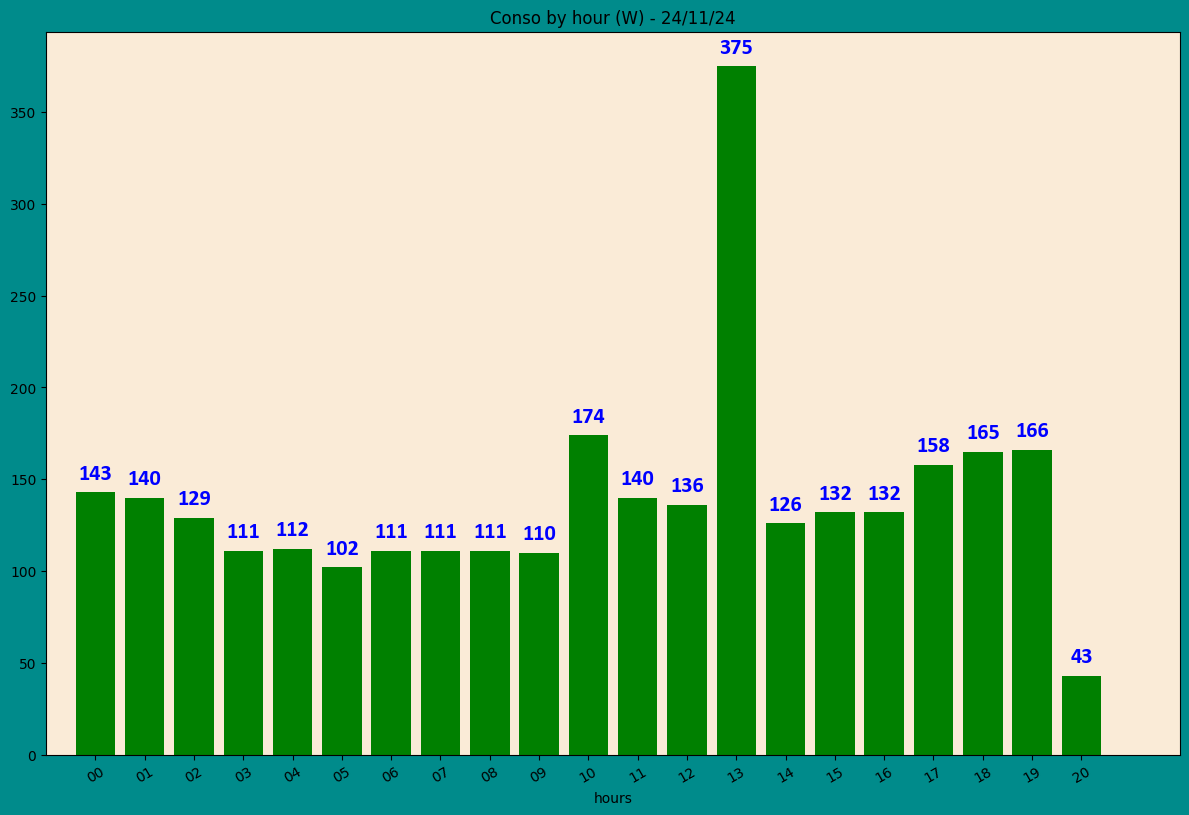

In [117]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [118]:
month.describe()


count    30.000000
mean      3.622033
std       0.337017
min       3.139000
25%       3.367250
50%       3.601000
75%       3.832750
max       4.570000
Name: kWh, dtype: float64

<Axes: >

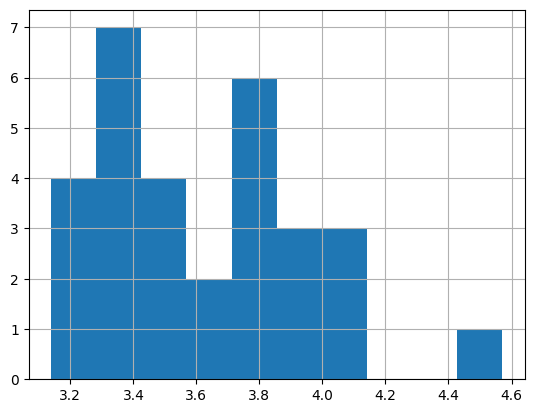

In [119]:
month.hist()

<Axes: xlabel='days'>

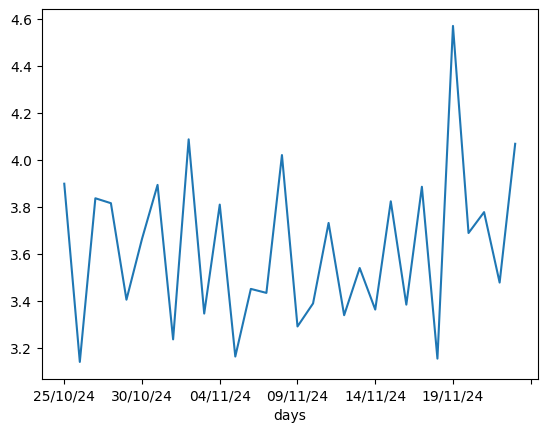

In [120]:
month.plot()

In [121]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [122]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

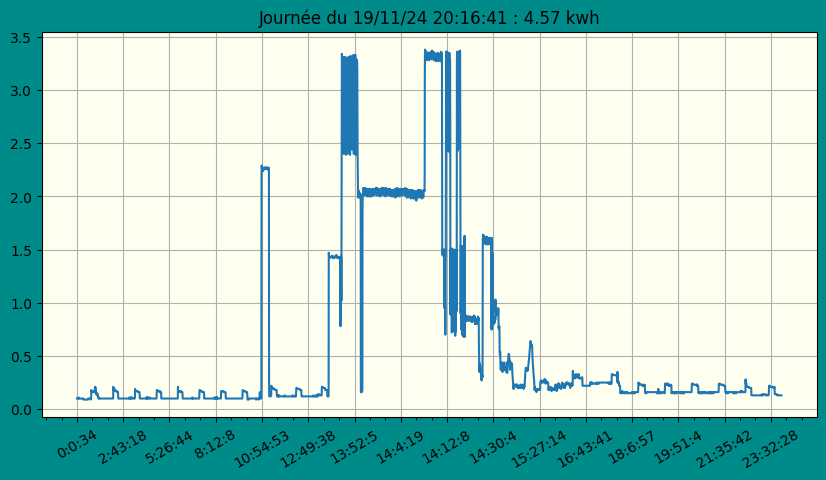

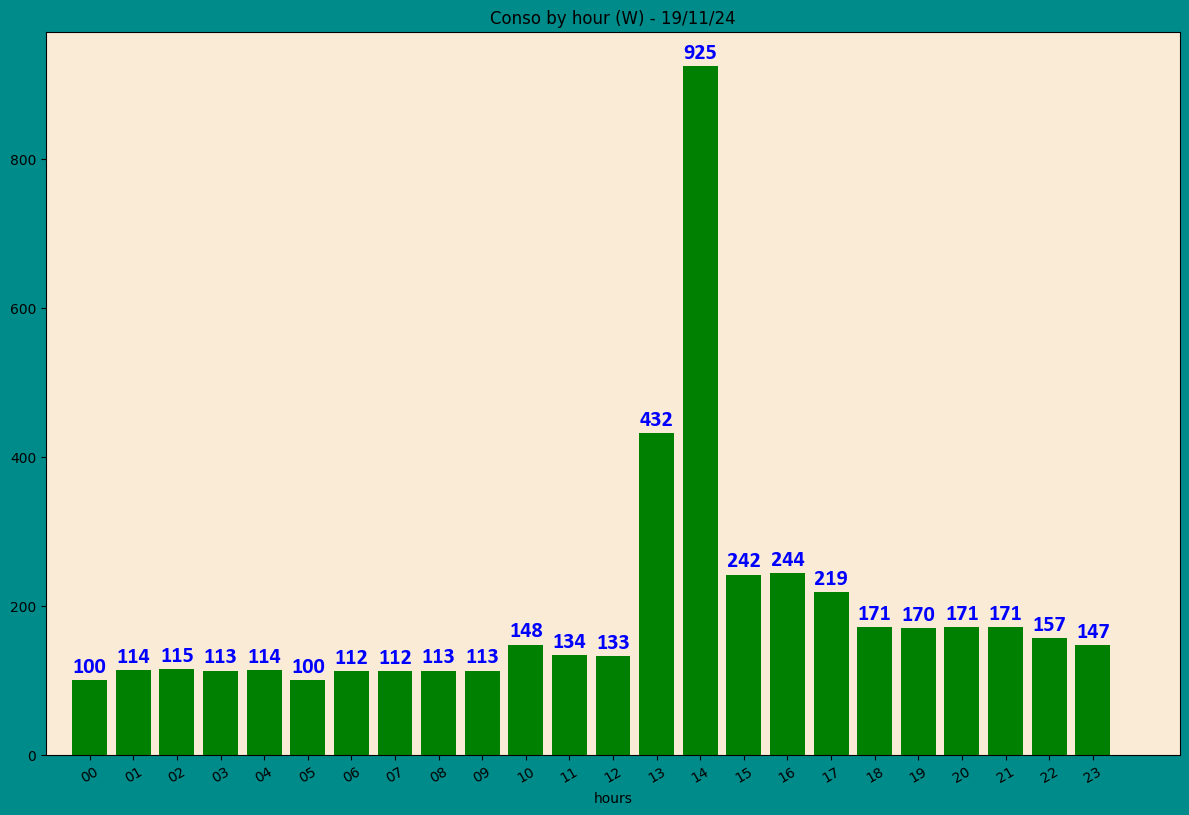

In [123]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [124]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     157     157    NaN   NaN
         20     284     441  127.0   NaN
         21     130     571 -154.0   NaN
         22     130     701    0.0   NaN
         23     130     831    0.0   NaN
...             ...     ...    ...   ...
24/11/24 16     132    2395    0.0  17.0
         17     158    2553   26.0  18.0
         18     165    2718    7.0  19.0
         19     166    2884    1.0  20.0
         20      43    2927 -123.0  21.0

[11066 rows x 4 columns]

In [125]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,100,100,NaN,NaN
01,114,214,14.0,NaN
02,115,329,1.0,NaN
03,113,442,-2.0,NaN
04,114,556,1.0,NaN
05,100,656,-14.0,NaN
06,112,768,12.0,NaN
07,112,880,0.0,NaN
08,113,993,1.0,NaN


In [126]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

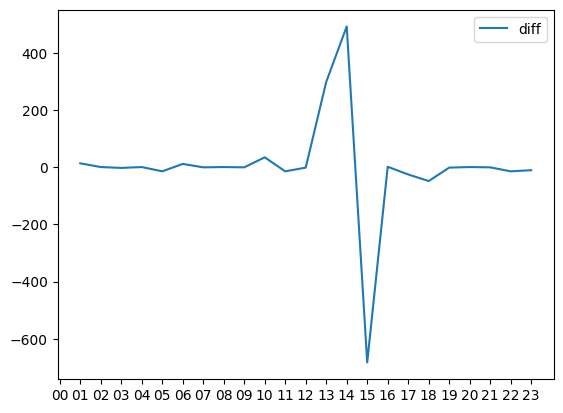

In [127]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

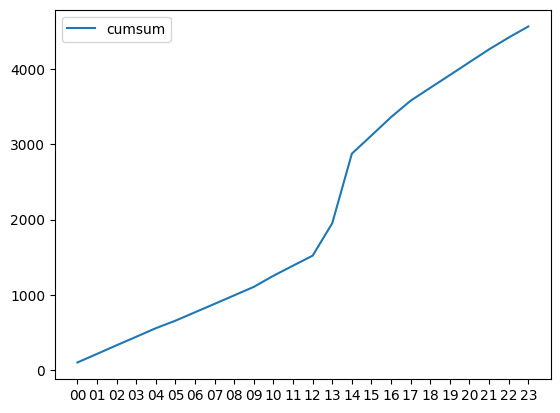

In [128]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [129]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB